In [1]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = Image.open('E:MSDS/MS-2/ML/face.jpg')
img_array = np.array(image)
rows, cols, bands = img_array.shape
X = img_array.reshape(rows * cols, bands)

In [3]:
X[0:5,:]

array([[244, 240, 241],
       [244, 240, 241],
       [244, 240, 241],
       [245, 241, 242],
       [245, 241, 242]], dtype=uint8)

In [4]:
'''
data = np.array([
    [1,0],
    [1,1],
    [2,0],
    [5,0],
    [5,1],
    [5,3]
])
'''
data=X

In [5]:
def calculate_distances(data,means):
    cost = np.zeros([data.shape[0],k])
    i = 0
    for m in temp_means:
        cost[0:data.shape[0],i]=np.sum(np.square(data - m),axis=1)
        i+=1
    return cost


In [6]:
def assign_cluster(distances,book_keeping):
    for i in range(book_keeping.shape[0]):
        book_keeping[i,np.argmin(distances[i])] = 1
    return book_keeping  

In [7]:
def preditc(data,means):
    label = []
    for point in data:
        dist=[]
        for m in means:
            d = point - m
            dist.append(np.mean(np.square(d)))
        label.append(np.argmin(dist))  
    return label 

StartedMeans:
[[143  93  60]
 [228 225 210]]
Trained Means:
[[151.43409045 115.40492125  89.76620699]
 [201.80347614 177.77539239 163.51702187]]


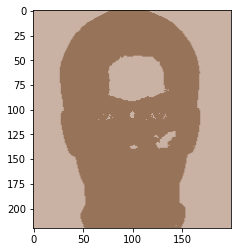

In [8]:
k=2
book_keeping = np.zeros([data.shape[0],k],dtype='int')
indices = np.random.choice(data.shape[0], size=k, replace=False)
means = data[indices]
temp_means = means
print("StartedMeans:")
print(temp_means)
b=False
while(b==False):
    distances = calculate_distances(data,temp_means)
    book_keeping = assign_cluster(distances,book_keeping)
    totals = np.sum(book_keeping,axis=0)
    temp_means = np.divide(np.dot(data.T,book_keeping),totals).T
    if np.array_equal(temp_means,means):
        print("Trained Means:")
        print(means)
        break
        
    else:
        means = temp_means
labels = np.array(preditc(data,means))
means_image = []
for i in labels:
    means_image.append(means[i])  
results=(np.array(means_image)).astype(np.uint8)  
results=results.reshape(rows,cols,bands)
plt.imshow(results)   